<a href="https://colab.research.google.com/github/sumantn16/Bank_Loan_Modelling/blob/master/Bank_Loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank_Loan_Modelling

- This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.
- The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

- The data set includes 5000 observations with fourteen variables divided into four different measurement categories. The binary category has five variables, including the target variable personal loan, also securities account, CD account, online banking and credit card. The interval category contains five variables: age, experience, income, CC avg and mortgage. The ordinal category includes the variables family and education. The last category is nominal with ID and Zip code. The variable ID does not add any interesting information e.g. individual association between a person (indicated by ID) and loan does not provide any general conclusion for future potential loan customers. Therefore, it will be neglected in the examination.

Column descriptions 
ID Customer ID 
Age Customer's age in completed years 
Experience #years of professional experience 
Income Annual income of the customer ($000) 
ZIPCode Home Address ZIP code. 
Family Family size of the customer 
CCAvg Avg. spending on credit cards per month ($000) 
Education Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
Mortgage Value of house mortgage if any. ($000) 
Personal Loan Did this customer accept the personal loan offered in the last campaign? 
Securities Account Does the customer have a securities account with the bank? 
CD Account Does the customer have a certificate of deposit (CD) account with the bank? 
Online Does the customer use internet banking facilities? 
CreditCard Does the customer uses a credit card issued by UniversalBank?

- Here our task is to identify potential loan customers for Thera Bank using different classification algorithms

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# importing all the necessary libraries for classification problem
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc, f1_score
import warnings
warnings.filterwarnings('ignore')

In [0]:
# loading the dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github/Bank_Personal_Loan_Modelling-1.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- As we can see that ID, Family, Education and zip code are the numerical variables but has to be categorical in nature. Lets change the data type of them

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Github/Bank_Personal_Loan_Modelling-1.csv', dtype={'ID':'category','Family':'category','Education':'category','ZIP Code' : 'category'})

In [0]:
# Lets see the dataset shape to get to know number of records and columns
df.shape

(5000, 14)

In [0]:
# Lets cross check for the data type category
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null category
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null category
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(4), float64(1), int64(9)
memory usage: 642.9 KB


- Hence, it confirms that there are no missing values present in any of the columns also the required columns datatype has now been changed to category. 
- Looking forward to perform some exploratory data analysis in order to get some iseful insights from the data.

### Exploratory Data Analysis

In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0
Online,5000.0,0.596800,0.490589,0.0,0.0,1.0,1.0,1.0
CreditCard,5000.0,0.294000,0.455637,0.0,0.0,0.0,1.0,1.0


In [0]:
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4189,4190,45,19,93,91116,2,1.70,2,0,0,0,0,0,0
984,985,50,25,15,92173,1,0.40,3,0,0,0,0,0,0
1788,1789,38,13,23,91116,4,0.20,3,0,0,0,0,1,0
1042,1043,64,34,50,95616,4,1.67,3,0,0,0,0,1,0
1765,1766,26,0,149,95051,2,7.20,1,154,0,0,0,0,0
510,511,51,26,62,95136,1,1.30,2,221,0,0,0,1,0
4265,4266,27,2,44,93943,4,0.60,2,0,0,1,1,1,0
4488,4489,30,4,50,91030,1,1.50,1,0,0,0,0,0,0
4962,4963,46,20,122,90065,3,3.00,3,0,1,0,1,1,1
3214,3215,61,37,33,91775,3,0.10,3,0,0,0,0,1,0


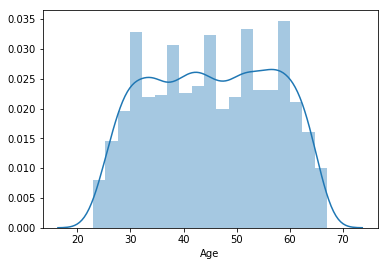

In [0]:
sns.distplot(df["Age"])
plt.show()

In [0]:
st.skew(df['Age']), st.kurtosis(df['Age'])

(-0.029331878574766698, -1.1531142779719183)

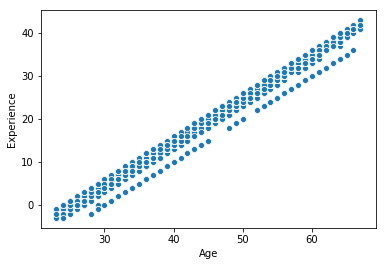

In [0]:
# Lets see if there any relation between the two predictors - age and experience
sns.scatterplot(x="Age", y="Experience", data=df)
plt.show()

- Hence the age factor shows a very good correleation with the experience. We can easily see this multi colinearity present here.

In [0]:
# Lets introduce a new column - Age Range, which classifies the age to a particular Age Range group.
bins = [21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 100]
labels = ['21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66+']
df['Age Range'] = pd.cut(df['Age'], bins, labels = labels, include_lowest = True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35


In [0]:
(df['Age Range'].value_counts(normalize=True)).sort_index()

21-25    0.0186
26-30    0.1062
31-35    0.1300
36-40    0.1172
41-45    0.1318
46-50    0.1222
51-55    0.1308
56-60    0.1338
61-65    0.1022
66+      0.0072
Name: Age Range, dtype: float64

- Bank has most customers in age range 26 to 65. 
- Across each 5 year age range, more or less there are similar number of customers.

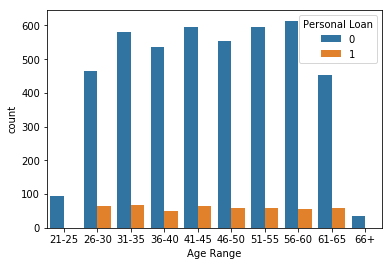

In [0]:
# lets check the newly featured variable age range having any relation with the target
sns.countplot(x='Age Range', hue='Personal Loan', data=df)
plt.show()

- People from Age Range 26 to 65 are generally the one who borrows loan
- Small observation : People in early thirties have slightly more personal loan requirement than late thirties.
- Similarly for early fourties & early fifties have slightly more personal loan requirement than late fourties and late fities respectively. The trend continues even in early sixties.

In [0]:
pd.crosstab(index=df['Age Range'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Age Range,,
21-25,0.0186,0.0000
26-30,0.0930,0.0132
31-35,0.1164,0.0136
36-40,0.1072,0.0100
41-45,0.1190,0.0128
46-50,0.1106,0.0116
51-55,0.1188,0.0120
56-60,0.1228,0.0110
61-65,0.0904,0.0118


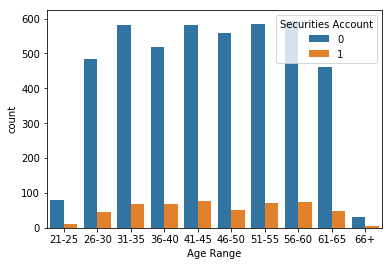

In [0]:
sns.countplot(x='Age Range', hue='Securities Account', data=df)
plt.show()

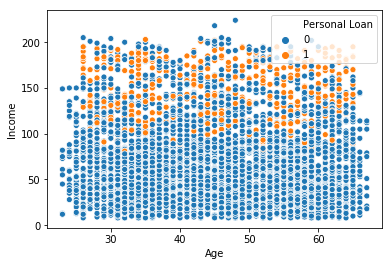

In [0]:
sns.scatterplot(x='Age', y='Income', hue = 'Personal Loan', data=df)
df[['Age', 'Income']].corr()
plt.show()

- It's weak correlation between Age and Income
- Across different ages, more people in higher income group (Over 100K) take Personal Loan

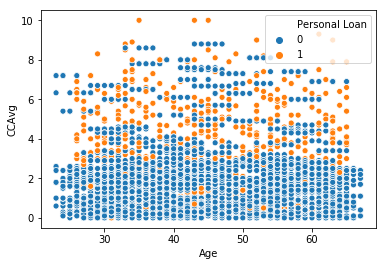

,Age,CCAvg
Age,1.000000,-0.052012
CCAvg,-0.052012,1.000000


In [0]:
sns.scatterplot(x='Age', y='CCAvg', hue = 'Personal Loan', data=df)
plt.show()
df[['Age', 'CCAvg']].corr()

- It's a weak correlation between Age and CCAvg
- Across diffeent ages, more people with higher CreditCard spending (approximately above 3K) go for Personal Loan

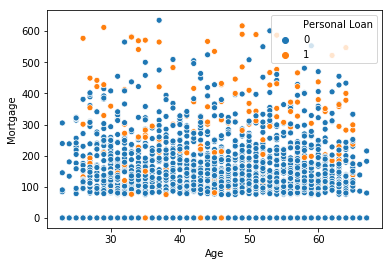

,Age,Mortgage
Age,1.000000,-0.012539
Mortgage,-0.012539,1.000000


In [0]:
sns.scatterplot(x='Age', y='Mortgage', hue = 'Personal Loan', data=df)
plt.show()
df[['Age', 'Mortgage']].corr()

- It's a weak correlation between Age and Mortgage
- Across different ages, more people with Mortgage above 200K go for Personal Loan

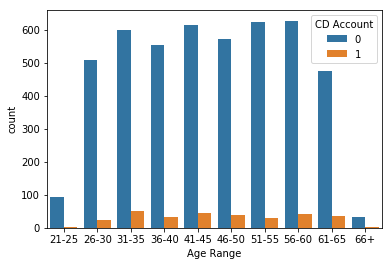

In [0]:
sns.countplot(x='Age Range', hue='CD Account', data=df)
plt.show()

- Across Age Ranges there are less number of CD Accounts

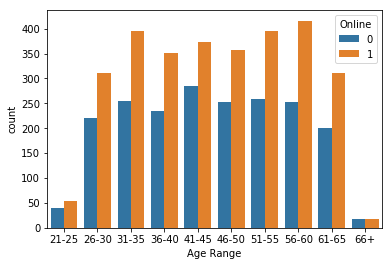

In [0]:
sns.countplot(x='Age Range', hue='Online', data=df)
plt.show()

- Across age groups, people using Online banking are more compared to the ones not using Online

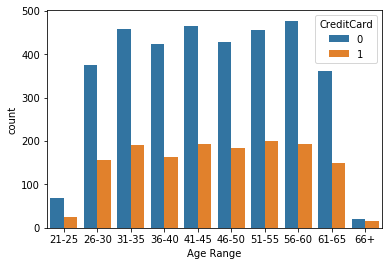

In [0]:
sns.countplot(x='Age Range', hue='CreditCard', data=df)
plt.show()

- Across age groups, there are less number of CreditCard users

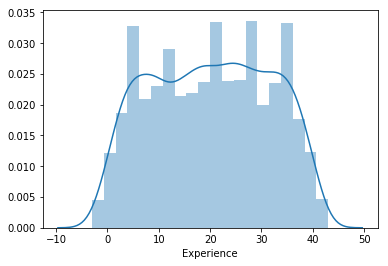

In [0]:
# Lets now perform some analysis over the experience predictor
sns.distplot(df['Experience'])
plt.show()

- There are a few bad values (negative Experience) in Experience field

In [0]:
df[df['Experience']<0].count()['ID']

52

- There are 52 records in experience with negative values, but experience cannot be negative.
- We can assume that it was an input data entry error and we can convert those in the positive values for better analysis.

In [0]:
df.Experience = np.abs(df.Experience)

In [0]:
# Lets cross check if any negative value is there
df[df['Experience']<0].count()['ID']

0

In [0]:
st.skew(df['Experience'])

-0.010034983346403046

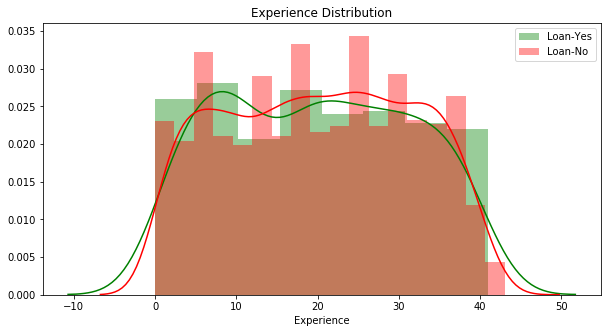

In [0]:
plt.figure(figsize=(10,5))
sns.distplot(df.Experience[df['Personal Loan']==1], kde=True, color='g',label='Loan-Yes')
sns.distplot(df.Experience[df['Personal Loan']==0], kde=True,color='r', label='Loan-No')
plt.title('Experience Distribution')
plt.legend()
plt.show()

- As we can the see that experience is majorly distributed between 0 to 40 years and for people who have taken loan or not are also distributed throughout the range.

In [0]:
# Similar to the age group, lets also create a new column - Experience Range, that classifies the given record to a particular Experience Range group.
bins = [1, 10, 20, 30, 40, 90]
labels = ['1-10', '11-20', '21-30', '31-40', '41+']
df['Experience Range'] = pd.cut(df['Experience'], bins, labels = labels, include_lowest = True)
df.head()


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range,Experience Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25,1-10
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45,11-20
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40,11-20
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35,1-10
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35,1-10


In [0]:
pd.crosstab(index=df['Experience Range'], columns=df['Personal Loan'],normalize=True)

Personal Loan,0,1
Experience Range,,
1-10,0.222335,0.025537
11-20,0.230036,0.023916
21-30,0.239562,0.024118
31-40,0.202675,0.020876
41+,0.009526,0.001419


- People with 1 to 40 years experience go for Personal Loans.
- With people in 1-10 years Experience Range, have more need for Personal Loan. Other Age Range groups also have nearly close need for Personal Loan.

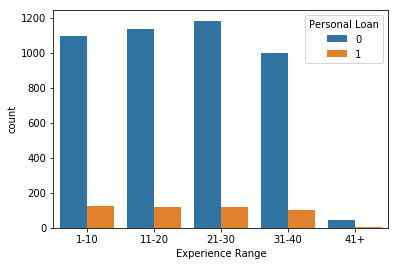

In [0]:
sns.countplot(x='Experience Range', hue='Personal Loan', data=df)
plt.show()

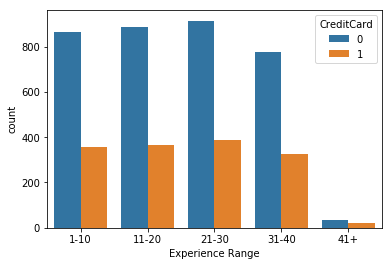

In [0]:
sns.countplot(x='Experience Range', hue='CreditCard', data=df)
plt.show()

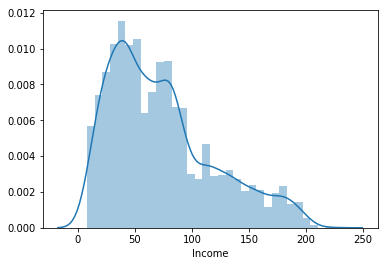

In [0]:
# lets now focus on Income variable for analysis
sns.distplot(a=df['Income'])
plt.show()

- It can be easily seen as Income data is rightly skewed
- High Income bars between 30K to 80K

In [0]:
st.skew(df['Income'])

0.8410861846424931

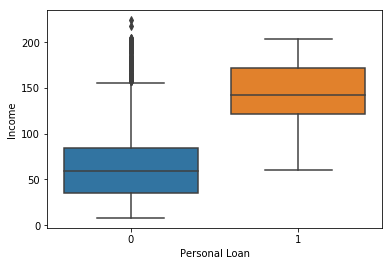

In [0]:
sns.boxplot(x='Personal Loan',y='Income', data=df)
plt.show()

- More people with Income approximately Over 60K take Personal Loan

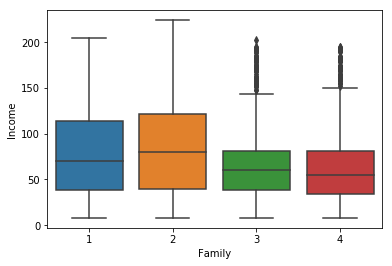

In [0]:
sns.boxplot(x='Family',y='Income', data=df)
plt.show()

- Looks like Family Size is not highly correlated with Income
- People have families of different sizes irrespective of their level of income

In [0]:
pd.crosstab(index=df['Family'], columns=df['Personal Loan'],normalize=True)

Personal Loan,0,1
Family,,
1,0.2730,0.0214
2,0.2380,0.0212
3,0.1754,0.0266
4,0.2176,0.0268


- Hence, its obvious that large families usually ask for personal loan. So the applications for personal loan being more in case of family size of 3 or 4 than that of small families.

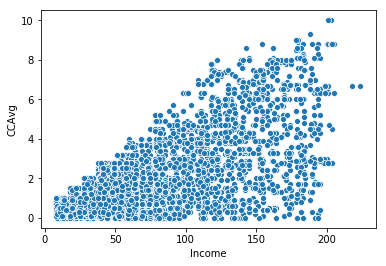

,Income,CCAvg
Income,1.000000,0.645984
CCAvg,0.645984,1.000000


In [0]:
sns.scatterplot(x='Income', y='CCAvg', data=df)
plt.show()
df[['Income', 'CCAvg']].corr()


- There is a positive correlation between Income and CCAvg
- People generally tend to spend more with more income

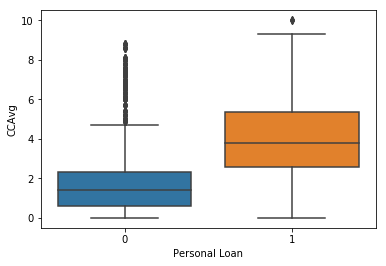

In [0]:
sns.boxplot(x='Personal Loan',y='CCAvg', data=df)
plt.show()

- Hence it can be easily seen from the above plot that, people with higher income spends more on credit card and also asks for personal loan.
-  More people with higher CreditCard spending (approximately above 3K) go for Personal Loan

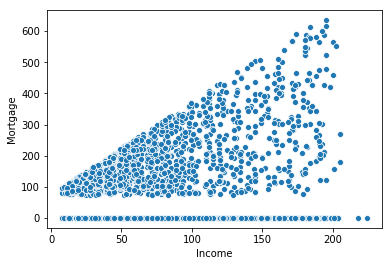

,Income,Mortgage
Income,1.000000,0.206806
Mortgage,0.206806,1.000000


In [0]:
sns.scatterplot(x='Income', y='Mortgage', data=df)
plt.show()
df[['Income', 'Mortgage']].corr()

- Not a very strong correlation between Income and Mortgage but there is some evidence that people tend to go for higher Mortgage with higher Incomes
- Also there are many cases where people are not asking for the mortgages and is not dependent on the Income factor.

In [0]:
# Lets create a new column - Income Range, that classifies the given record to a particular Income Range group.
bins = [1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 500]
labels = ['1-20', '21-40', '41-60', '61-80', '81-100', '101-120', '121-140', '141-160', '161-180', '180+']
df['Income Range'] = pd.cut(df['Income'], bins, labels = labels, include_lowest = True)
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Age Range,Experience Range,Income Range
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,21-25,1-10,41-60
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,41-45,11-20,21-40
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,36-40,11-20,1-20
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,31-35,1-10,81-100
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,31-35,1-10,41-60


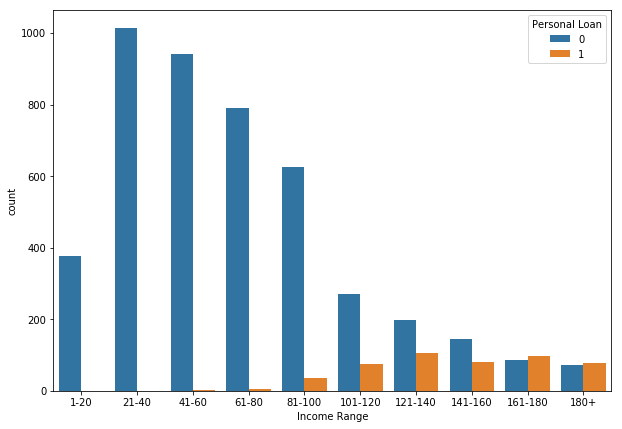

In [0]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Income Range', hue='Personal Loan', data=df)
plt.show()

- Again another evidence that people with 60K and more Income go for Personal Loan.
- With highest Personal Loan takers in Income Range 121-140K

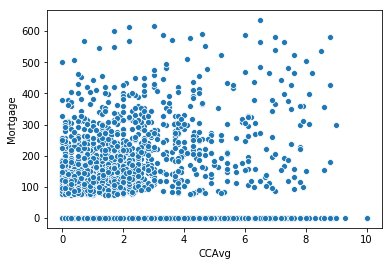

,CCAvg,Mortgage
CCAvg,1.000000,0.109905
Mortgage,0.109905,1.000000


In [0]:
sns.scatterplot(x='CCAvg', y='Mortgage', data=df)
plt.show()
df[['CCAvg', 'Mortgage']].corr()

- It's relatively weak correlation between CCAvg and Mortgage

In [0]:
pd.crosstab(index=df['Education'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Education,,
1,0.4006,0.0186
2,0.2442,0.0364
3,0.2592,0.0410


- There are more people with Education Level 2 (Graduate) & Education Level 3 (Advanced Professional) going for Personal Loans

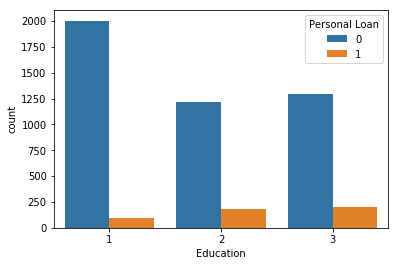

In [0]:
sns.countplot(x='Education', hue='Personal Loan', data=df)
plt.show()

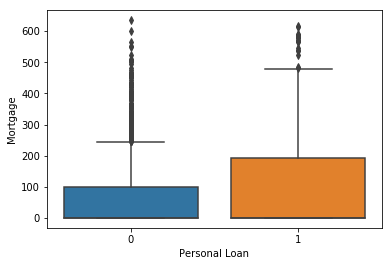

,Personal Loan,Mortgage
Personal Loan,1.000000,0.142095
Mortgage,0.142095,1.000000


In [0]:
sns.boxplot(x='Personal Loan',y='Mortgage', data=df)
plt.show()
df[['Personal Loan', 'Mortgage']].corr()

- Mortgage has some correlation (not so strong though, not significant enough) with Personal Loan

In [0]:
pd.crosstab(index=df['Securities Account'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Securities Account,,
0,0.8116,0.084
1,0.0924,0.012


- More people without Securities Account go for Personal Loan

In [0]:
pd.crosstab(index=df['CD Account'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
CD Account,,
0,0.8716,0.068
1,0.0324,0.028


- More people without CD Account go for Personal Loan

In [0]:
df[['CD Account', 'Personal Loan']].corr()

,CD Account,Personal Loan
CD Account,1.000000,0.316355
Personal Loan,0.316355,1.000000


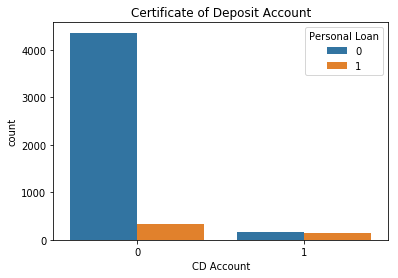

In [0]:
sns.countplot(x='CD Account', hue='Personal Loan',data=df)
plt.title('Certificate of Deposit Account')
plt.show()

- There is a good correlation between CD Account and Personal Loan
- This plot represents that the people having the certificate of deposit account with the bank has high probability of taking personal loan than people with CD account.

In [0]:
pd.crosstab(index=df['Online'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
Online,,
0,0.3654,0.0378
1,0.5386,0.0582


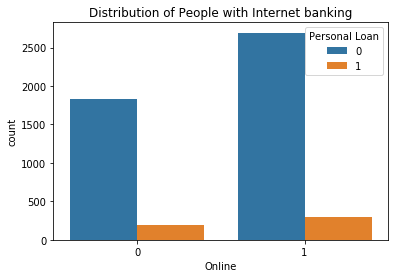

In [0]:
sns.countplot(x='Online', hue='Personal Loan',data=df)
plt.title('Distribution of People with Internet banking')
plt.show()

- There is a marginal difference between the people who have taken loan and internet banking and people who have taken loan without internet banking.

In [0]:
pd.crosstab(index=df['CreditCard'], columns=df['Personal Loan'], normalize=True)

Personal Loan,0,1
CreditCard,,
0,0.6386,0.0674
1,0.2654,0.0286


- More people not using CreditCard go for Personal Loan

In [0]:
df[['CreditCard', 'Personal Loan']].corr()

,CreditCard,Personal Loan
CreditCard,1.000000,0.002802
Personal Loan,0.002802,1.000000


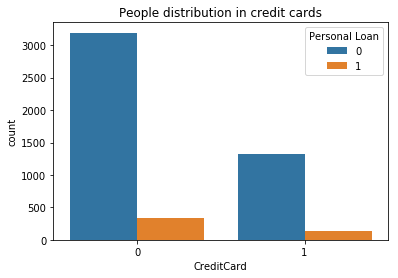

In [0]:
sns.countplot(x='CreditCard', hue='Personal Loan',data=df)
plt.title('People distribution in credit cards')
plt.show()

- Very weak correlation between CreditCard and Personal Loan
- This distribution of people with credit card & loan and without credit card & loan are not much different from each other. The conversion rate of liability customer in both the cases are almost similar

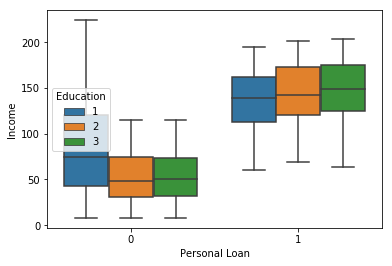

In [0]:
sns.boxplot('Personal Loan', 'Income', hue='Education', data=df)

- It can be seen that people with higher education and high income generally applies for a loan 

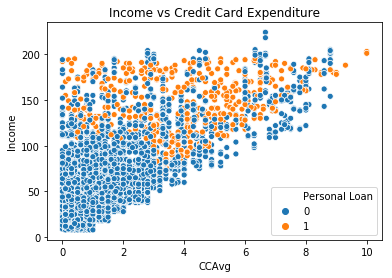

In [0]:
sns.scatterplot(x='CCAvg', y='Income',hue='Personal Loan', data=df)
plt.title('Income vs Credit Card Expenditure')
plt.show()

- From the scatter plot between income and credit card expenditure, we can clearly see that people with low income have low credit card spending and have not taken a personal loan. 
- But with higher income and expenditure the people who have taken loan and not are mixed in that population

In [0]:
df['ZIP Code'].nunique()

467

In [0]:
pd.Series([i[:2] for i in df['ZIP Code']]).nunique()

7

In [0]:
df['ZIP Code'] = pd.Series([i[:2] for i in df['ZIP Code']])

In [0]:
df['ZIP Code'].value_counts()

94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: ZIP Code, dtype: int64

In [0]:
pd.crosstab(index=df['ZIP Code'],columns=df['Personal Loan'],normalize=True)

Personal Loan,0,1
ZIP Code,,
90,0.1272,0.0134
91,0.1020,0.0110
92,0.1788,0.0188
93,0.0748,0.0086
94,0.2668,0.0276
95,0.1470,0.0160
96,0.0074,0.0006


- Hence the Zipcode prefixes are significant n terma od personal loan. Maybe it represents a state or a district.
- So that we can conclude that those regions having zip code initialises with 94,92 and 90 are having more number of loan applicants than that of the rest.

In [0]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

- It is very obvious that the data is imbalance as we have only 480 rows of personal loan taken against 4520 rows of loan not taken. 
- In such cases the model tends to be biased towards the level having maximum values. To resolve this situation we can do over-sampling by using SMOTE to get the balanced dataset

In [0]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard', 'Age Range', 'Experience Range',
       'Income Range'],
      dtype='object')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
ID                    5000 non-null category
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null object
Family                5000 non-null category
CCAvg                 5000 non-null float64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
Age Range             5000 non-null category
Experience Range      4934 non-null category
Income Range          5000 non-null category
dtypes: category(6), float64(1), int64(9), object(1)
memory usage: 664.3+ KB


In [0]:
df[['Securities Account','CD Account', 'Online', 'CreditCard']]=df[['Securities Account','CD Account', 'Online', 'CreditCard']].astype('category')

In [0]:
# Lets drop the columns for which we have created new significant featured columns
df = df.drop(['ID', 'Age', 'Experience','Income Range'], axis=1)

In [0]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

## Check which features have good correlation with Personal Loan

In [0]:
# Checking if the correlation with 'Personal Loan' is strong (i.e not between -0.1 and +0.1)
(df.corr()['Personal Loan'] >= 0.1) | (df.corr()['Personal Loan'] <= -0.1) 

Income           True
CCAvg            True
Mortgage         True
Personal Loan    True
Name: Personal Loan, dtype: bool

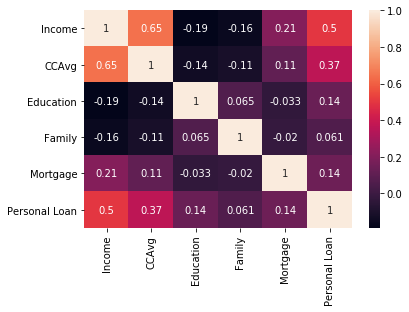

In [0]:
df['Education'] = df['Education'].astype('int64')
df['Family'] = df['Family'].astype('int64')
sns.heatmap(df[['Income', 'CCAvg', 'Education', 'Family', 'Mortgage', 'CD Account', 'Personal Loan']].corr(), annot=True)

## Some Pivot comparison between Borrowers and Non-Borrowers

In [0]:
df.pivot_table(index='Personal Loan', aggfunc='mean')
# Even this Pivot table tells the same story that features like CCAvg, CD Account, Education, Income, Mortgage
# & additionally Family have distinguished values between borrowers and non-borrowers

,CCAvg,Education,Family,Income,Mortgage
Personal Loan,,,,,
0,1.729009,1.843584,2.373451,66.237389,51.789381
1,3.905354,2.233333,2.612500,144.745833,100.845833


In [0]:
df['Education'] = df['Education'].astype('category')
df['Family'] = df['Family'].astype('category')

# [Section-B] Common functions

In [0]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

In [0]:
def model_scores(model_name, y_test, y_pred):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

In [0]:
def model_scores_cross_validation(model_name, d):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    result[model_name] = [d['test_accuracy'].mean(), 
                          d['test_recall'].mean(),
                          d['test_precision'].mean(),
                          d['test_f1'].mean()]
    return result

# [Section-C] Logistic Regression

In [0]:
# Taking only those features that we identified before (Added )
# X = df[['Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account', 'Family']]
dummy_X = pd.get_dummies(X)
X.head()

,Income,CCAvg,Mortgage,ZIP Code_90,ZIP Code_91,ZIP Code_92,ZIP Code_93,ZIP Code_94,ZIP Code_95,ZIP Code_96,Family_1,Family_2,Family_3,Family_4,Education_1,Education_2,Education_3,Securities Account_0,Securities Account_1,CD Account_0,CD Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Age Range_21-25,Age Range_26-30,Age Range_31-35,Age Range_36-40,Age Range_41-45,Age Range_46-50,Age Range_51-55,Age Range_56-60,Age Range_61-65,Age Range_66+,Experience Range_1-10,Experience Range_11-20,Experience Range_21-30,Experience Range_31-40,Experience Range_41+
0,49,1.6,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,34,1.5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,11,1.0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,100,2.7,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,45,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
y = df['Personal Loan']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(dummy_X, y, test_size=0.30, random_state=44)

In [0]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)

In [0]:
confusion_matrix(y_test, y_pred)

array([[1324,    9],
       [  60,  107]])

In [0]:
y_test.head()

3187    0
141     0
2544    1
4027    0
3528    0
Name: Personal Loan, dtype: int64

In [0]:
result_lr = model_scores('Logistic Regression', y_test, y_pred)
result_lr

,Logistic Regression
Accuracy,0.954000
Recall,0.640719
Precision,0.922414
F1 Score,0.756184


### Extra Work - Find the Optimum Threshold

In [0]:
y_pred_prob = model_lr.predict_proba(X_test)

In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [0]:
roc_auc = auc(fpr, tpr)
roc_auc

0.9537039948609907

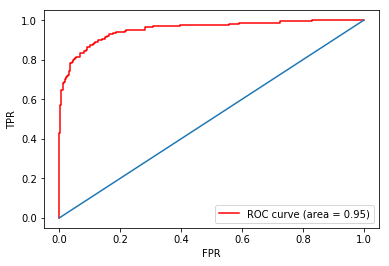

In [0]:
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")

In [0]:
optimumT = 0
optimumF1 = 0
optimumCM = 0

In [0]:
for threshold in thresholds:
    y_pred_new = np.where(y_pred_prob[:,1] > threshold, 1, 0)
    f1 = f1_score(y_test, y_pred_new)
    cm = confusion_matrix(y_test, y_pred_new)
    if (f1 > optimumF1):
        optimumT = threshold
        optimumF1 = f1
        optimumCM = cm

In [0]:
optimumT, optimumF1

(0.4143485836605906, 0.760942760942761)

In [0]:
optimumCM

array([[1316,   17],
       [  54,  113]])

### Extra Work - Cross Validation

In [0]:
scores = cross_validate(model_lr, X, y, cv=5, scoring=scoring, return_train_score=False)

In [0]:
result_lr_cv = model_scores_cross_validation('Logistic Regression', scores)
result_lr_cv

,Logistic Regression
Accuracy,0.958200
Recall,0.668750
Precision,0.865549
F1 Score,0.754469


# [Section-D] KNN

In [0]:
model_knn = KNeighborsClassifier()

In [0]:
from scipy.stats import zscore

In [0]:
scaled_X = X.apply(zscore)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=44)

In [0]:
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [0]:
confusion_matrix(y_pred, y_test)

array([[1332,  126],
       [   1,   41]])

In [0]:
result_knn = model_scores('KNN with K = 5', y_test, y_pred)
result_knn

,KNN with K = 5
Accuracy,0.915333
Recall,0.245509
Precision,0.976190
F1 Score,0.392344


### Extra Work - Find the best K Value

In [0]:
def build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test):
    result = pd.DataFrame(index = ['Accuracy', 'Recall', 'Precision', 'F1 Score'])
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        model_knn.fit(X_train, y_train)
                
        y_pred = model_knn.predict(X_test)
        
        # Just manually doing recall, precision calculation for my future reference
        cm = confusion_matrix(y_test, y_pred)
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        precision = np.diag(cm) / np.sum(cm, axis = 0)
    
        result['K={}'.format(k)] = [accuracy_score(y_test, y_pred), 
                         recall_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         f1_score(y_test, y_pred)]
    return result

In [0]:
klist = range(1, 20, 2)
results_knn = build_compare_knn_classifier(klist, X_train, y_train, X_test, y_test)
results_knn
# Looks like K

,K=1,K=3,K=5,K=7,K=9,K=11,K=13,K=15,K=17,K=19
Accuracy,0.914000,0.917333,0.915333,0.913333,0.911333,0.907333,0.906667,0.906667,0.906000,0.906000
Recall,0.389222,0.317365,0.245509,0.221557,0.215569,0.179641,0.173653,0.161677,0.161677,0.155689
Precision,0.706522,0.841270,0.976190,1.000000,0.947368,0.937500,0.935484,1.000000,0.964286,1.000000
F1 Score,0.501931,0.460870,0.392344,0.362745,0.351220,0.301508,0.292929,0.278351,0.276923,0.269430


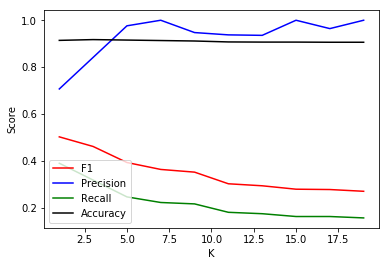

In [0]:
plt.plot(klist, results_knn.loc['F1 Score'], color='red', label="F1")
plt.plot(klist, results_knn.loc['Precision'], color='blue', label="Precision")
plt.plot(klist, results_knn.loc['Recall'], color='green', label="Recall")
plt.plot(klist, results_knn.loc['Accuracy'], color='black', label="Accuracy")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend(loc="lower left")

In [0]:
def build_compare_knn_classifier_kfold_cv(klist, X, y):
    result = pd.DataFrame()
    for k in klist:
        model_knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_validate(model_knn, X, y, cv=10, scoring=scoring)
        res = model_scores_cross_validation('K={}'.format(k), scores)
        result = pd.concat([result, res], axis=1, sort=False)
    return result

In [0]:
klist = range(1, 40, 2)

In [0]:
result_knn_cv = build_compare_knn_classifier_kfold_cv(klist, X, y)
result_knn_cv

,K=1,K=3,K=5,K=7,K=9,K=11,K=13,K=15,K=17,K=19,K=21,K=23,K=25,K=27,K=29,K=31,K=33,K=35,K=37,K=39
Accuracy,0.920200,0.918400,0.919600,0.917800,0.918800,0.916200,0.916600,0.914400,0.914800,0.915200,0.911600,0.910600,0.911800,0.910600,0.910800,0.910800,0.910400,0.910200,0.910000,0.909200
Recall,0.489583,0.389583,0.387500,0.358333,0.350000,0.337500,0.325000,0.300000,0.291667,0.283333,0.270833,0.256250,0.264583,0.254167,0.247917,0.243750,0.239583,0.233333,0.235417,0.227083
Precision,0.603888,0.619603,0.637186,0.631203,0.649129,0.618925,0.627820,0.607095,0.616373,0.625783,0.587331,0.579313,0.590384,0.582084,0.589430,0.578626,0.581006,0.575720,0.579455,0.570890
F1 Score,0.540273,0.477593,0.480054,0.455351,0.452085,0.434920,0.425722,0.397286,0.392803,0.386274,0.366939,0.349978,0.360489,0.349181,0.343938,0.338900,0.334568,0.328618,0.330550,0.320471


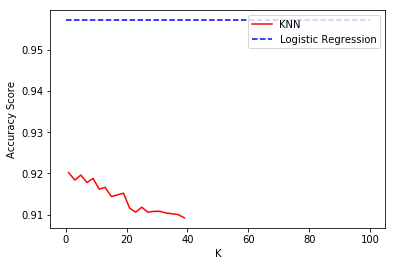

In [0]:
#plt.yscale()
plt.plot(klist, result_knn_cv.loc['Accuracy'], color='red', label="KNN")
plt.plot([0, 100], [0.957200, 0.957200], color='blue', linestyle='dashed', label="Logistic Regression")
plt.xlabel("K")
plt.ylabel("Accuracy Score")
plt.legend(loc="upper right")


In [0]:
parameter={'n_neighbors' : np.arange(1, 50, 2)}
GS=GridSearchCV(model_knn, parameter, cv=5, scoring='f1')
GS.fit(X,y)
GS.best_params_

{'n_neighbors': 1}

# [Section-E] Naive Bayes

In [0]:
model_gnb = GaussianNB()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=44)
model_gnb.fit(X_train, y_train)
y_pred = model_gnb.predict(X_test)

In [0]:
confusion_matrix(y_pred, y_test)

array([[  37,    0],
       [1296,  167]])

In [0]:
model_scores("GaussianNB", y_test, y_pred)

,GaussianNB
Accuracy,0.136000
Recall,1.000000
Precision,0.114149
F1 Score,0.204908


### Extra Work - Cross Validation

In [0]:
scores = cross_validate(model_gnb, X, y, cv=5, scoring=scoring, return_train_score=False)
result_gnb_cv = model_scores_cross_validation('GaussianNB', scores)
result_gnb_cv

,GaussianNB
Accuracy,0.901800
Recall,0.485417
Precision,0.487698
F1 Score,0.486382


# [Section-F] Comparison between 3 Models

In [0]:
final_result = pd.DataFrame()
final_result = pd.concat([result_lr_cv, result_knn_cv['K=1'], result_knn_cv['K=3'], result_knn_cv['K=5'], result_knn_cv['K=7'], result_gnb_cv], axis=1, sort=False)
final_result

,Logistic Regression,K=1,K=3,K=5,K=7,GaussianNB
Accuracy,0.957200,0.981000,0.976600,0.972800,0.971600,0.901800
Recall,0.643750,0.854167,0.791667,0.745833,0.722917,0.485417
Precision,0.877837,0.945428,0.958484,0.962978,0.976050,0.487698
F1 Score,0.742735,0.895459,0.866152,0.839626,0.828641,0.486382


#### Conclusion: 

Using Cross Validation resampling method, the three models have been compared against multiple matrices like Accuracy, 
Recall, Precision and F1 Score. Clearly KNN gives the best result across these matrices. KNN performs better because it's  naturally realted to the problem statement. People coming from similar financial background are bound to go for Personal Loans.